# Analysis of the fluoresence intensity from the 4 point ODMR experiments

In this script I will read in the data from the .txt file that holds all of the information about the fluorescence intensity. 
I will create graphs that look at the:
1. Change in fluorescence intensity with increased dwell time. 
2. The change in the fraction error of the recorded data points for the 4 point measurements for the STD of the measurements recorded. 
3. The change in the fraction error of the recorded data points for the 4 point measurements for the SQRT of the mean recorded counts. 

In [1]:
import matplotlib.pyplot as plot
import scipy.optimize as opt
import os 
import pandas as pd 
import numpy as np 

In [2]:
def load_data(file_path):
    # load in the params data. 
    four_point_data = pd.read_table(file_path, index_col = False) 
    return(four_point_data)

In [3]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 16})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [29]:
def plot_sqrt(x, A, b, c):
    '''Creates a Y = A/root(b*T) dataset.'''
    sqrt_value = np.sqrt(b*x)
    with np.errstate(divide='ignore'):
        y = (A /sqrt_value) + c
    return(y)

In [5]:
def plot_linear(x, m, c):
    '''Creates a linear fitting'''
    
    y = m*x + c
    return(y)

### Get the data into a pandas variable

In [6]:
folder_path = 'H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\20210921\\'
file_path = folder_path + '20210921_4_point_referenced_odmr_normalised_intensity_analysis.txt'
data_set = load_data(file_path)
set_plot_params()
#print(data_set)

### Get the data into arrays

In [7]:
dwell_time = data_set['Dwell time ($\mu$s)']
I_1 = data_set['I_1 (per dwell time)']
I_1_std = data_set['STD(I_1) (per dwell time)']
I_2 = data_set['I_2 (per dwell time)']
I_2_std = data_set['STD(I_2) (per dwell time)']
I_3 = data_set['I_3 (per dwell time)']
I_3_std = data_set['STD(I_3) (per dwell time)']
I_4 = data_set['I_4 (per dwell time)']
I_4_std = data_set['STD(I_4) (per dwell time)']

#I_1 = data_set['I_1_norm ']
#I_1_std = data_set['error I_1_norm ']
#I_2 = data_set['I_2_norm ']
#I_2_std = data_set['error I_2_norm ']
#I_3 = data_set['I_3_norm ']
#I_3_std = data_set['error I_3_norm ']
#I_4 = data_set['I_4_norm ']
#I_4_std = data_set['error I_4_norm']
#print(I_4[0])
#print(I_4_std)

### Analysis for a single measurement 
This is the code that is used for finding the fittings for the percentage error for these measurements. 

In [8]:
f_value = 0
I = []
dwell_t = []
STD_I = []

for i in range(int(len(dwell_time)/7)):
    dwell_t.append(dwell_time[i*7]/1000)
    I.append([I_1[i*7]/1000, I_2[i*7]/1000, I_3[i*7]/1000, I_4[i*7]/1000])
    STD_I.append([I_1_std[i*7]/1000, I_2_std[i*7]/1000, I_3_std[i*7]/1000, I_4_std[i*7]/1000])

dwell_t = np.array(dwell_t)
I = np.array(I)
STD_I = np.array(STD_I)
fractional_error = 100*(STD_I/I)
P0 = [5,0.3, 0.1]

coeffs, confidence = opt.curve_fit(plot_sqrt, dwell_t, fractional_error[:, f_value], P0)
#error = np.diag(confidence)
print(coeffs)
print(np.diag(np.sqrt(confidence)))

dense_dwell_t = np.linspace(np.min(dwell_t), np.max(dwell_t), 100)

y = plot_sqrt(dense_dwell_t, coeffs[0], coeffs[1], coeffs[2])

P1 = [0,0]
coeffs_1, confidence_1 = opt.curve_fit(plot_linear, dwell_t, I[:, f_value], P1)
y2 = plot_linear(dwell_t, coeffs_1[0], coeffs_1[1])
#print(I[6,3])

[2.88398328 0.32533069 0.36976156]
[       nan        nan 0.12149255]


C:\Users\Ryan\AppData\Local\conda\conda\envs\Ryan\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
C:\Users\Ryan\AppData\Local\conda\conda\envs\Ryan\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


### Plot and save the data. 

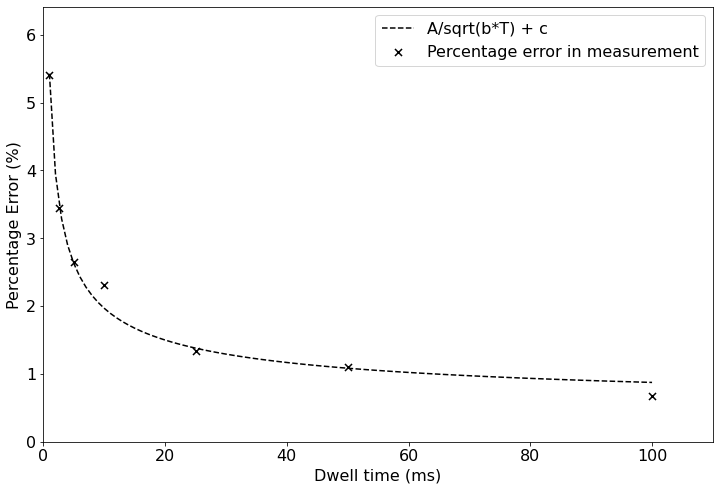

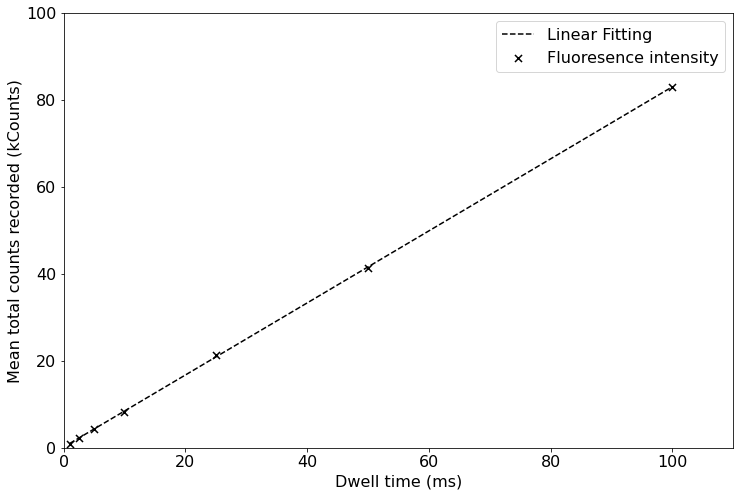

In [9]:
fig, ax = plot.subplots()
ax.scatter(dwell_t, fractional_error[:, f_value], marker = 'x', color = 'k', 
           label = 'Percentage error in measurement', s = 50)
ax.set_xlabel('Dwell time (ms)')
ax.set_ylabel('Percentage Error (%)')
ax.plot(dense_dwell_t, y, label = 'A/sqrt(b*T) + c', color = 'k',
        linestyle = '--')
plot.axis([0, 110, 0, np.max(fractional_error[:, f_value])+1])
ax.legend()

if I[3,0] > 1:
    fig1, ax1 = plot.subplots()
    ax1.scatter(dwell_t, I[:, f_value], marker = 'x', color = 'k', 
           label = 'Fluoresence intensity', s = 50)
    ax1.set_xlabel('Dwell time (ms)')
    ax1.set_ylabel('Mean total counts recorded (kCounts)')
    ax1.plot(dwell_t, y2, label = 'Linear Fitting', color = 'k', 
        linestyle = '--')
    plot.axis([0, 110, 0, 100])
    ax1.legend()

In [435]:
if I[3,0] > 1:
    fig.savefig(folder_path + 'I_' + str(f_value + 1) + '_percentage_error.pdf')
    fig1.savefig(folder_path + 'I_' + str(f_value + 1) + '_Intensity_plot.pdf')
else:
    fig.savefig(folder_path + 'I_' + str(f_value + 1) + 'normailised_I_percentage_error.pdf')

In [423]:
if I[3,0] > 1:
    output_data_file1 = folder_path + 'percentage_error_analysis.txt'
    output_data_file2 = folder_path + 'Intensity_analysis.txt'
else: 
    output_data_file1 = folder_path + 'Normalised_percentage_error_analysis.txt'
    
    
if os.path.isfile(output_data_file1) == False:
        with open(output_data_file1, "w") as wf:
            wf.write('I(i)'  + '\t' +
                     'Gradient' + '\t' + 'Time Constant' + '\t' + 
                     'Offset' + '\n')
# Writing contrast dip description to the .dat file
    
with open(output_data_file1, "a") as wf:
    wf.write(str(f_value)  + '\t' +
             str(coeffs[0]) + " \t"  + str(coeffs[1]) + " \t" + 
             str(coeffs[2]) + '\n')
            
            
if I[3,0] > 1:
    if os.path.isfile(output_data_file2) == False:
        with open(output_data_file2, "w") as wf:
            wf.write('I(i)'  + '\t' +
                     'Gradient' + '\t' + 
                     'Offset' + '\n')            
            
        with open(output_data_file2, "a") as wf:
            wf.write(str(f_value)  + '\t' +
            str(coeffs_1[0]) + " \t"  + str(coeffs_1[1]) +  '\n') 

# mean intensity vs error across measurements

In [10]:
mean_I_1_across_measurements = []
mean_I_2_across_measurements = []
mean_I_3_across_measurements = []
mean_I_4_across_measurements = []

std_I1_measurement = []
std_I2_measurement = []
std_I3_measurement = []
std_I4_measurement = []

f_value = 0
a = 0

for i in range(7):
    mean_I_1_across_measurements.append(np.mean(I_1[(i)*7:(i+1)*7]))
    mean_I_2_across_measurements.append(np.mean(I_2[(i)*7:(i+1)*7]))
    mean_I_3_across_measurements.append(np.mean(I_3[(i)*7:(i+1)*7]))
    mean_I_4_across_measurements.append(np.mean(I_4[(i)*7:(i+1)*7]))
   
    std_I1_measurement.append(np.sqrt(np.sum(np.power(I_1_std[(i)*7:(i+1)*7], 2)))/np.sqrt(7))
    std_I2_measurement.append(np.sqrt(np.sum(np.power(I_2_std[(i)*7:(i+1)*7], 2)))/np.sqrt(7))
    std_I3_measurement.append(np.sqrt(np.sum(np.power(I_3_std[(i)*7:(i+1)*7], 2)))/np.sqrt(7))
    std_I4_measurement.append(np.sqrt(np.sum(np.power(I_4_std[(i)*7:(i+1)*7], 2)))/np.sqrt(7))


In [11]:
print(mean_I_1_across_measurements)
print(std_I1_measurement)

[923.2914285714286, 2255.4085714285716, 4406.625714285714, 8272.795714285714, 21045.324285714287, 40295.64, 81238.44714285714]
[54.22688342247123, 87.03724227511543, 125.26473303710482, 179.6576551985152, 308.97826943931557, 474.3591962998986, 658.5013251206973]


[2.78902956 0.25336941 0.35448052]
[923.2914285714286, 2255.4085714285716, 4406.625714285714, 8272.795714285714, 21045.324285714287, 40295.64, 81238.44714285714]


C:\Users\Ryan\AppData\Local\conda\conda\envs\Ryan\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


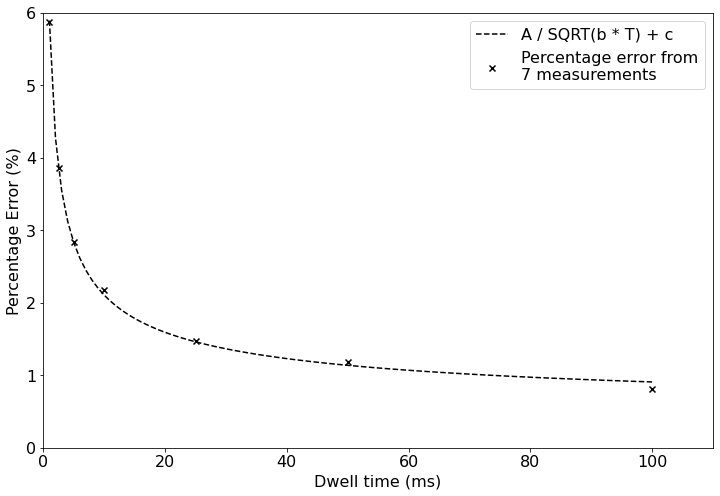

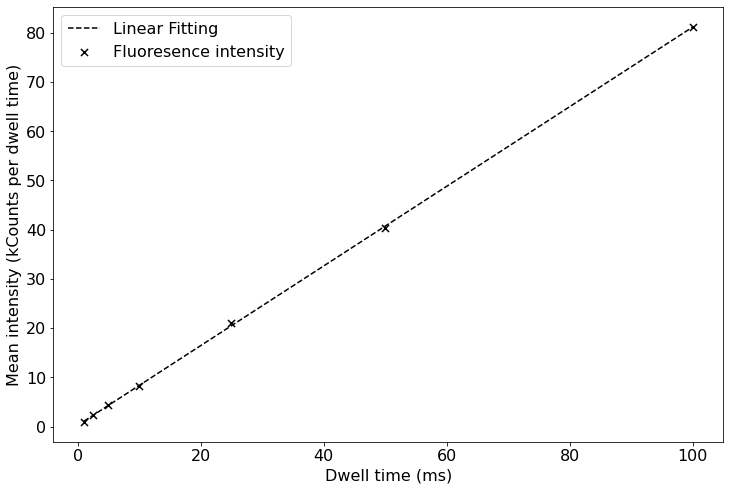

In [12]:
percentage_error_all_measurements = 100*(np.array(std_I1_measurement)/np.array(mean_I_1_across_measurements))

fig2, ax2 = plot.subplots()

ax2.scatter(dwell_t, percentage_error_all_measurements, marker = 'x', color = 'k',
            label = 'Percentage error from\n7 measurements')
ax2.set_xlabel('Dwell time (ms)')
ax2.set_ylabel('Percentage Error (%)')

P0 = [5,0.3, 0.1]

coeffs, confidence = opt.curve_fit(plot_sqrt, dwell_t, percentage_error_all_measurements, P0)
#error = np.diag(confidence)
print(coeffs)

y3 = plot_sqrt(dense_dwell_t, coeffs[0], coeffs[1], coeffs[2])
plot.plot(dense_dwell_t, y3, linestyle = '--', color = 'k',
         label = 'A / SQRT(b * T) + c')
ax2.legend()
ax2.axis([0,110, 0, 6])



P1 = [0,0]
coeffs_1, confidence_1 = opt.curve_fit(plot_linear, dwell_t, np.array(mean_I_1_across_measurements)/1000, P1)
y4 = plot_linear(dwell_t, coeffs_1[0], coeffs_1[1])

print(mean_I_1_across_measurements)

fig3, ax3 = plot.subplots()
ax3.scatter(dwell_t, np.array(mean_I_1_across_measurements)/1000, marker = 'x', color = 'k', 
           label = 'Fluoresence intensity', s = 50)
ax3.set_xlabel('Dwell time (ms)')
ax3.set_ylabel('Mean intensity (kCounts per dwell time)')
ax3.plot(dwell_t, y4, label = 'Linear Fitting', color = 'k', 
        linestyle = '--')
#plot.axis([0, 110, 0, 100])
ax3.legend()


In [229]:
fig2.savefig(folder_path + 'I_' +  '_percentage_error_full_set.pdf')
fig3.savefig(folder_path + 'I_' +  '_Intensity_plot_full_set.pdf')

In [231]:
output_data_file3 = folder_path + 'percentage_error_analysis_full_Set.txt'

output_data_file4 = folder_path + 'Intensity_analysis_full_set.txt'

if os.path.isfile(output_data_file3) == False:
        with open(output_data_file3, "w") as wf:
            wf.write('I(i)'  + '\t' +
                     'Gradient' + '\t' + 'Time Constant' + '\t' + 
                     'Offset' + '\n')

if os.path.isfile(output_data_file4) == False:
        with open(output_data_file4, "w") as wf:
            wf.write('I(i)'  + '\t' +
                     'Gradient' + '\t' + 
                     'Offset' + '\n')            
            
            
# Writing contrast dip description to the .dat file
    
with open(output_data_file3, "a") as wf:
    wf.write(str(f_value)  + '\t' +
             str(coeffs[0]) + " \t"  + str(coeffs[1]) + " \t" + 
             str(coeffs[2]) + '\n')

with open(output_data_file4, "a") as wf:
    wf.write(str(f_value)  + '\t' +
            str(coeffs_1[0]) + " \t"  + str(coeffs_1[1]) +  '\n') 

# Measurement of noise in the system. 

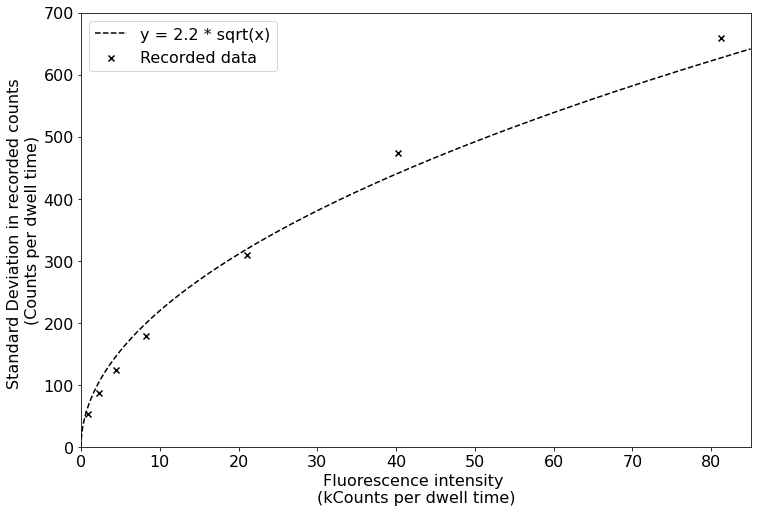

In [13]:
fig5, ax5 = plot.subplots()

mean_I_1_across_measurements_kC = np.array(mean_I_1_across_measurements)*0.001

ax5.scatter(mean_I_1_across_measurements_kC, std_I1_measurement, label = 'Recorded data', 
             marker = 'x', color = 'k')
ax5.set_xlabel('Fluorescence intensity \n(kCounts per dwell time)')
ax5.set_ylabel('Standard Deviation in recorded counts \n(Counts per dwell time)')

x5 = np.linspace(0, 85000, 10000)
y6 = 2.2*np.sqrt(x5)

#y5 = plot_sqrt(x5, -100, 8.6*10**(-9), 10000)

ax5.plot(x5/1000, y6, label = 'y = 2.2 * sqrt(x)', 
          color = 'k', linestyle = '--')
ax5.axis([0, 85, 0, 700])
ax5.legend()

fig5.savefig(folder_path + 'Systematic_error_in_photon_collection.pdf')

In [263]:
print(std_I1_measurement)
print(np.sqrt(mean_I_1_across_measurements))

[54.22688342247123, 87.03724227511543, 125.26473303710482, 179.6576551985152, 308.97826943931557, 474.3591962998986, 658.5013251206973]
[ 30.38571093  47.49114203  66.38242022  90.95491034 145.07006682
 200.73773935 285.0235905 ]


In [264]:
print(np.sqrt(mean_I_1_across_measurements)/std_I1_measurement)

[0.56034404 0.54564162 0.52993703 0.50626794 0.46951544 0.42317666
 0.43283678]


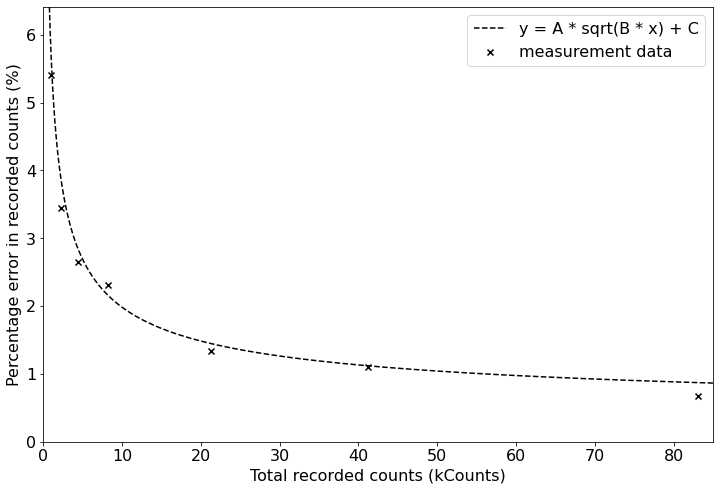

In [33]:
fig6, ax6 = plot.subplots()

ax6.scatter(I[:, f_value], fractional_error[:, f_value], marker = 'x', 
            color = 'k', label = 'measurement data')
ax6.set_xlabel('Total recorded counts (kCounts)')
ax6.set_ylabel('Percentage error in recorded counts (%)')
ax6.axis([0, 85, 0, np.max(fractional_error[:, f_value]) + 1])

P = [2.78902956, 1, 1]#0.25336941, 0.35448052]
lower_bounds = [-np.inf, 0.001, -np.inf]
upper_bounds = [np.inf, np.inf, np.inf]

coeffs, confidence = opt.curve_fit(plot_sqrt, mean_I_1_across_measurements, percentage_error_all_measurements,
                                   P, bounds = (lower_bounds, upper_bounds))
#print(coeffs)
y6 = plot_sqrt(x5, coeffs[0], coeffs[1], coeffs[2])

ax6.plot(x5/1000, y6, linestyle = '--', color = 'k', label = 'y = A * sqrt(B * x) + C')
ax6.legend()
fig6.savefig(folder_path + 'output.pdf')

In [31]:
print(folder_path + 'Error_vs_counts_recorded.pdf')



H:\My Documents\Strathclyde_Back_up\Thesis and Planning\Thesis_plots\20210921\Error_vs_counts_recorded.pdf
